In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


from numpy import mean  
from numpy import std  
from sklearn.datasets import make_classification  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import StackingClassifier  
from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Dense, Activation

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
df=pd.read_csv('LendingClub.csv')

In [3]:
df.shape

(2260668, 145)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check Missing Values and Unique Values
pd.set_option('display.max_rows', None)
pd.concat([df.isna().sum(),df.nunique()],axis=1).rename(columns = {0:'Nulls',1:'Uniques'})

,Nulls,Uniques
id,2260668,0
member_id,2260668,0
loan_amnt,0,1572
funded_amnt,0,1572
funded_amnt_inv,0,10057
term,0,2
int_rate,0,673
installment,0,93296
grade,0,7
sub_grade,0,35


In [6]:
# Meaningless Features from common sense
df.drop(['id', 'member_id','url','desc','disbursement_method'], axis = 1, inplace = True)

In [7]:
# Only 1 value in the dataset
df.drop(['policy_code','hardship_type',
         'hardship_end_date'], axis = 1, inplace = True)

In [8]:
# Meaningless Features because too many categories
df.drop(['zip_code','title','emp_title'], axis = 1, inplace = True)

In [9]:
# Drop duplicate features
df.drop(['grade'], axis = 1, inplace = True)

In [10]:
# Time does not matter to the prediction
df.drop(['issue_d','earliest_cr_line',
         'last_pymnt_d','next_pymnt_d',
        'next_pymnt_d','last_credit_pull_d',
        'sec_app_earliest_cr_line',
        'hardship_start_date','debt_settlement_flag_date'
        ,'settlement_date'],axis = 1, inplace = True )

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
# Drop columns with too many null values
df.drop(['annual_inc_joint','dti_joint',
        'verification_status_joint',], axis = 1, inplace = True)

In [13]:
df.shape

(2260668, 121)

In [14]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
sub_grade                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
addr_state                                     object
dti                                           float64
delinq_2yrs                                   float64
inq_last_6mths                                float64
mths_since_last_delinq      

In [15]:
df.drop(df[df['loan_status']=='In Grace Period'].index,inplace=True)
df.loan_status=df.loan_status.apply(lambda x: 0 if x in 
                     ['Current',
                      'Fully Paid',
                      'Does not meet the credit policy. Status:Fully Paid']
                    else 1)
df.loan_status.value_counts()

0    1963635
1     288081
Name: loan_status, dtype: int64

In [16]:
df_no_default=df[df['loan_status']==0]
df_no_default=df_no_default.sample(320000,random_state=2)
df_default=df[df['loan_status']==1]
df=pd.concat([df_default,df_no_default])
df = shuffle(df)

In [17]:
df.pymnt_plan =df.pymnt_plan .apply(lambda x: 0 if x=='n' else 1)
df.initial_list_status=df.initial_list_status.apply(lambda x: 0 if x=='f' else 1)
df.payment_plan_start_date=df.payment_plan_start_date.apply(lambda x:1 if type(x)==str else 0 )
df.debt_settlement_flag=df.debt_settlement_flag.apply(lambda x:1 if x =='Y' else 0 )

In [18]:
df.dropna(subset=['open_acc','pub_rec',
                  'revol_util','total_acc',
                 'collections_12_mths_ex_med',
                 'acc_now_delinq',
                 'chargeoff_within_12_mths',
                 'delinq_amnt','tax_liens','pub_rec_bankruptcies',
                 ],inplace=True)

In [19]:
df.mths_since_last_delinq.fillna(1000,inplace=True)
df.mths_since_last_record.fillna(1000,inplace=True)
df.mths_since_last_major_derog.fillna(1000,inplace=True)
df.hardship_reason.fillna('None',inplace=True)
df.hardship_status.fillna('None',inplace=True)
df.deferral_term.fillna(0,inplace=True)
df.hardship_loan_status.fillna('None',inplace=True)
df.settlement_status.fillna('None',inplace=True)
df.settlement_amount.fillna(0,inplace=True)
df.settlement_percentage.fillna(0,inplace=True)
df.settlement_term.fillna(0,inplace=True)
df.hardship_amount.fillna(0,inplace=True)
df.dti.fillna(np.mean(df.dti),inplace=True)
df.emp_length.fillna('None',inplace=True)
df.fillna(0,inplace=True)

In [20]:
pd.concat([df.isna().sum(),df.nunique(),df.dtypes],axis=1).rename(columns = {0:'Nulls',1:'Uniques',2:'Dtypes'})

,Nulls,Uniques,Dtypes
loan_amnt,0,1554,int64
funded_amnt,0,1554,int64
funded_amnt_inv,0,4023,float64
term,0,2,object
int_rate,0,627,float64
installment,0,67995,float64
sub_grade,0,35,object
emp_length,0,12,object
home_ownership,0,6,object
annual_inc,0,37121,float64


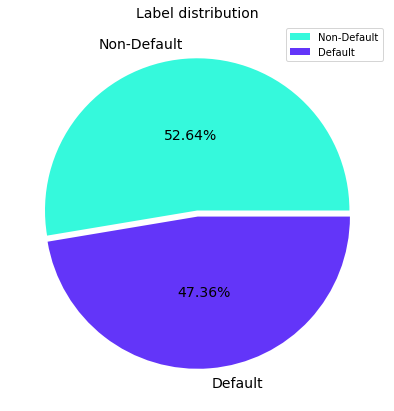

In [21]:
pie, ax = plt.subplots(figsize=[10,7])
labels = ['Non-Default', 'Default']
colors = ['#35f9dc', '#6335f9']
plt.pie(x = df['loan_status'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Label distribution',fontsize=14)
plt.legend(loc='upper right')
plt.show()

## Feature Engineering

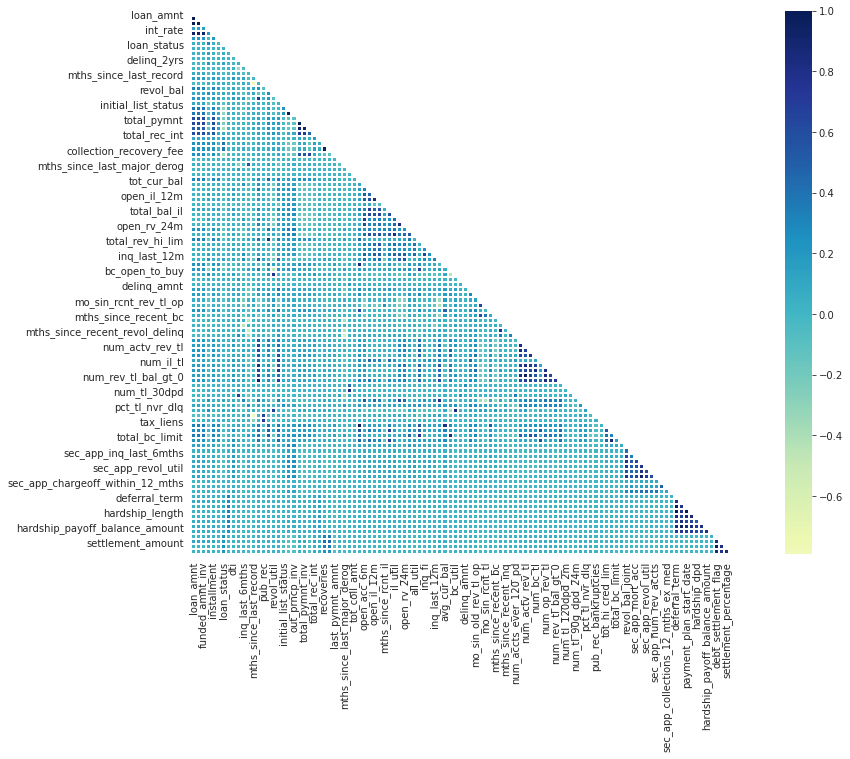

In [22]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap="YlGnBu", center=0, linewidths=0.1, square=True)

Text(0.5, 1.0, 'Correlation coefficient of the variables')

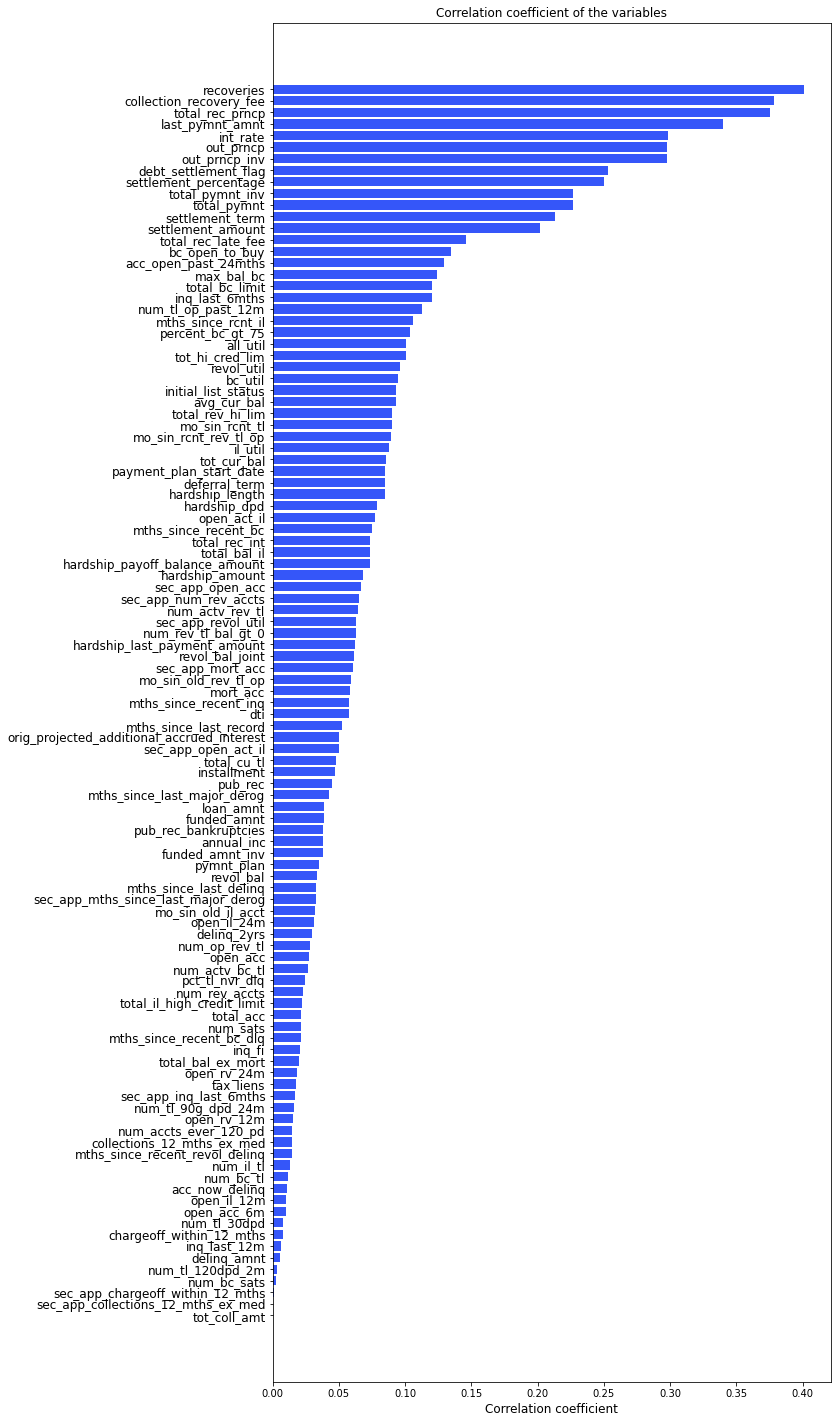

In [23]:
x_cols = [col for col in df.columns if col not in ['loan_status'] if df[col].dtype!='object']
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df['loan_status'],values)[0, 1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df= corr_df.dropna(how='any',axis=0)
corr_df.corr_values=corr_df.corr_values.apply(lambda x: abs(x))
corr_df = corr_df.sort_values(by = 'corr_values')
ind = corr_df.col_labels
width = 0.5
fig,ax = plt.subplots(figsize = (10,25))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='#3556f9')

ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal',fontsize=12)
ax.set_xlabel('Correlation coefficient',fontsize=12)
ax.set_title('Correlation coefficient of the variables',fontsize=12)

In [24]:
# Drop correlation=0
df.drop(['tot_coll_amt','sec_app_collections_12_mths_ex_med',
         'sec_app_chargeoff_within_12_mths'],axis=1,inplace=True)

In [25]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column term has the following distribution: 
 36 months    406898
 60 months    200204
Name: term, dtype: int64
The column home_ownership has the following distribution: 
MORTGAGE    282927
RENT        255958
OWN          67911
ANY            231
OTHER           63
NONE            12
Name: home_ownership, dtype: int64
The column verification_status has the following distribution: 
Source Verified    241457
Verified           190945
Not Verified       174700
Name: verification_status, dtype: int64
The column loan_status has the following distribution: 
0    319566
1    287536
Name: loan_status, dtype: int64
The column pymnt_plan has the following distribution: 
0    606428
1       674
Name: pymnt_plan, dtype: int64
The column initial_list_status has the following distribution: 
1    393634
0    213468
Name: initial_list_status, dtype: int64
The column application_type has the following distribution: 
Individual    580635
Joint App      26467
Name: application_type, dtype: int64
The 

In [26]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['loan_status'], axis=1).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [27]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

In [28]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [29]:
X = df.drop(columns='loan_status')
y = df['loan_status']

In [30]:
X= preprocessor.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## XGBoost Tree Model

[20:29:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:29:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score = 0.9559645559609613
ROC AUC score = 0.9578980073930405
accuracy score = 0.9596445425420644


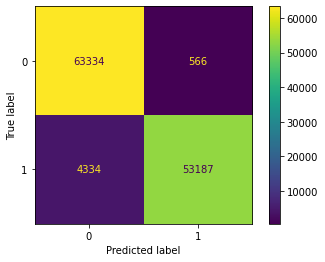

In [146]:
xgc = xgb.XGBClassifier(booster='gbtree', tree_method='hist', colsample_bytree=0.95,
                        learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=12, n_jobs=-1,
                        objective='multi:softmax', reg_alpha=0, reg_lambda=2, scale_pos_weight=1, num_class=2)
xgc.fit(X_train, y_train)

predictions = xgc.predict(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions)))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(xgc, X_test, y_test))

## Logistics Regression

f1 score = 0.9578311621482545
ROC AUC score = 0.9595701199853007
accuracy score = 0.9615305424926496


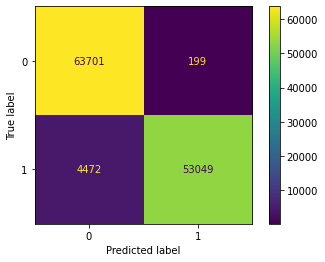

In [33]:
lr = LogisticRegression(random_state=0,C=1.0,max_iter=1000,penalty='l2')

lr.fit(X_train, y_train)

lr_pre=lr.predict(X_test)

print("f1 score = {}".format(f1_score(y_test, lr_pre)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, lr_pre)))

print("accuracy score = {}".format(accuracy_score(y_test, lr_pre)))

display(plot_confusion_matrix(lr, X_test, y_test))

## Deep Learning Neural Network

In [40]:
#生成Sequential 顺序模型
nn_model = Sequential()

#创建两个layer
layer1 = Dense(255,use_bias = False, input_dim=255, kernel_initializer='he_uniform', activation='relu')
layer2 = Dense(64,use_bias = False, kernel_initializer='he_uniform', activation='relu')
layer3 = Dense(32,use_bias = False, kernel_initializer='he_uniform', activation='relu')


#使用 .add() 来堆叠模型
nn_model.add(layer1)
#在第一层之后，就不再需要指定输入的尺寸了
nn_model.add(layer2)
nn_model.add(layer3)
nn_model.add(Dense(1, activation='sigmoid'))

#使用 .compile() 来配置学习过程
nn_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
                metrics=['accuracy'])


In [41]:
nn_model.fit(X_train, y_train,epochs=20, batch_size=8000)
nn_predict=nn_model.predict(X_test)

Epoch 1/20
61/61 [==============================] - 4s 46ms/step - loss: 0.3065 - accuracy: 0.8688
Epoch 2/20
61/61 [==============================] - 3s 44ms/step - loss: 0.1845 - accuracy: 0.9304
Epoch 3/20
61/61 [==============================] - 3s 42ms/step - loss: 0.1592 - accuracy: 0.9420
Epoch 4/20
61/61 [==============================] - 3s 41ms/step - loss: 0.1493 - accuracy: 0.9456
Epoch 5/20
61/61 [==============================] - 3s 43ms/step - loss: 0.1418 - accuracy: 0.9487
Epoch 6/20
61/61 [==============================] - 3s 42ms/step - loss: 0.1364 - accuracy: 0.9509
Epoch 7/20
61/61 [==============================] - 3s 41ms/step - loss: 0.1314 - accuracy: 0.9528
Epoch 8/20
61/61 [==============================] - 3s 43ms/step - loss: 0.1290 - accuracy: 0.9539
Epoch 9/20
61/61 [==============================] - 3s 43ms/step - loss: 0.1248 - accuracy: 0.9552
Epoch 10/20
61/61 [==============================] - 3s 46ms/step - loss: 0.1235 - accuracy: 0.9559
Epoch 11/

Train: 0.972, Test: 0.960


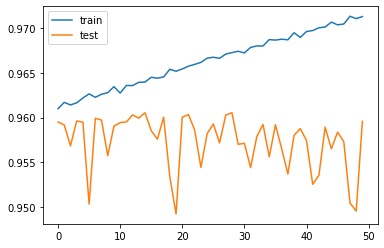

In [43]:
# fit model
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,batch_size=8000, verbose=0)
# evaluate the model
_, train_acc = nn_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = nn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [44]:
nn_pre=[]
for i in nn_predict:
    if i<0.5:
        nn_pre.append(0)
    else:
        nn_pre.append(1)
        

In [45]:
print("f1 score = {}".format(f1_score(y_test, nn_pre)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, nn_pre)))

print("accuracy score = {}".format(accuracy_score(y_test, nn_pre)))

f1 score = 0.9550917027429987
ROC AUC score = 0.9570999152544655
accuracy score = 0.9588209617776168


## Stacking

In [53]:
# get a stacking ensemble of models  
def get_stacking():  
 # define the base models  
    level0 = list()  
    level0.append(('xcg', xcg))  
    level0.append(('lr', lr))  
    level0.append(('nn_model', nn_model))  
 # define the stacking ensemble  
    model = StackingClassifier(estimators=level0, cv=5)  
    return model

In [54]:
# get a list of models to evaluate  
def get_models():  
    models = dict()    
    models['stacking'] = get_stacking()
    models['xcg'] = xcg
    models['lr'] = lr
    models['nn'] = nn_model
    return models 

In [55]:
def evaluate_model(model, X, y):  
    cv =RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)  
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')  
    return scores  
 

In [47]:
model_list=[xgc,lr,nn_model]

In [147]:
input_X=[]
input_X.append(list(nn_model.predict(X_train).T[0]))
input_X.append(list(xgc.predict_proba(X_train).T[1]))
input_X.append(list(lr.predict_proba(X_train).T[1]))
input_train=np.array(input_X).T

In [148]:
input_X_test=[]
input_X_test.append(nn_model.predict(X_test).T[0])
input_X_test.append(xgc.predict_proba(X_test).T[1])
input_X_test.append(lr.predict_proba(X_test).T[1])
input_test=np.array(input_X_test).T

f1 score = 0.9607642626480086
ROC AUC score = 0.9623314103505344
accuracy score = 0.9639765773630591


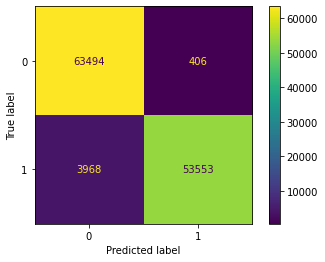

In [152]:
lr_s = LogisticRegression(C=0.0002,penalty='l2')
lr_s.fit(input_train,y_train)
prediction_stacking=lr_s.predict(input_test)
print("f1 score = {}".format(f1_score(y_test, prediction_stacking)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, prediction_stacking)))

print("accuracy score = {}".format(accuracy_score(y_test, prediction_stacking)))

display(plot_confusion_matrix(lr_s, input_test, y_test))

## Conclusion 

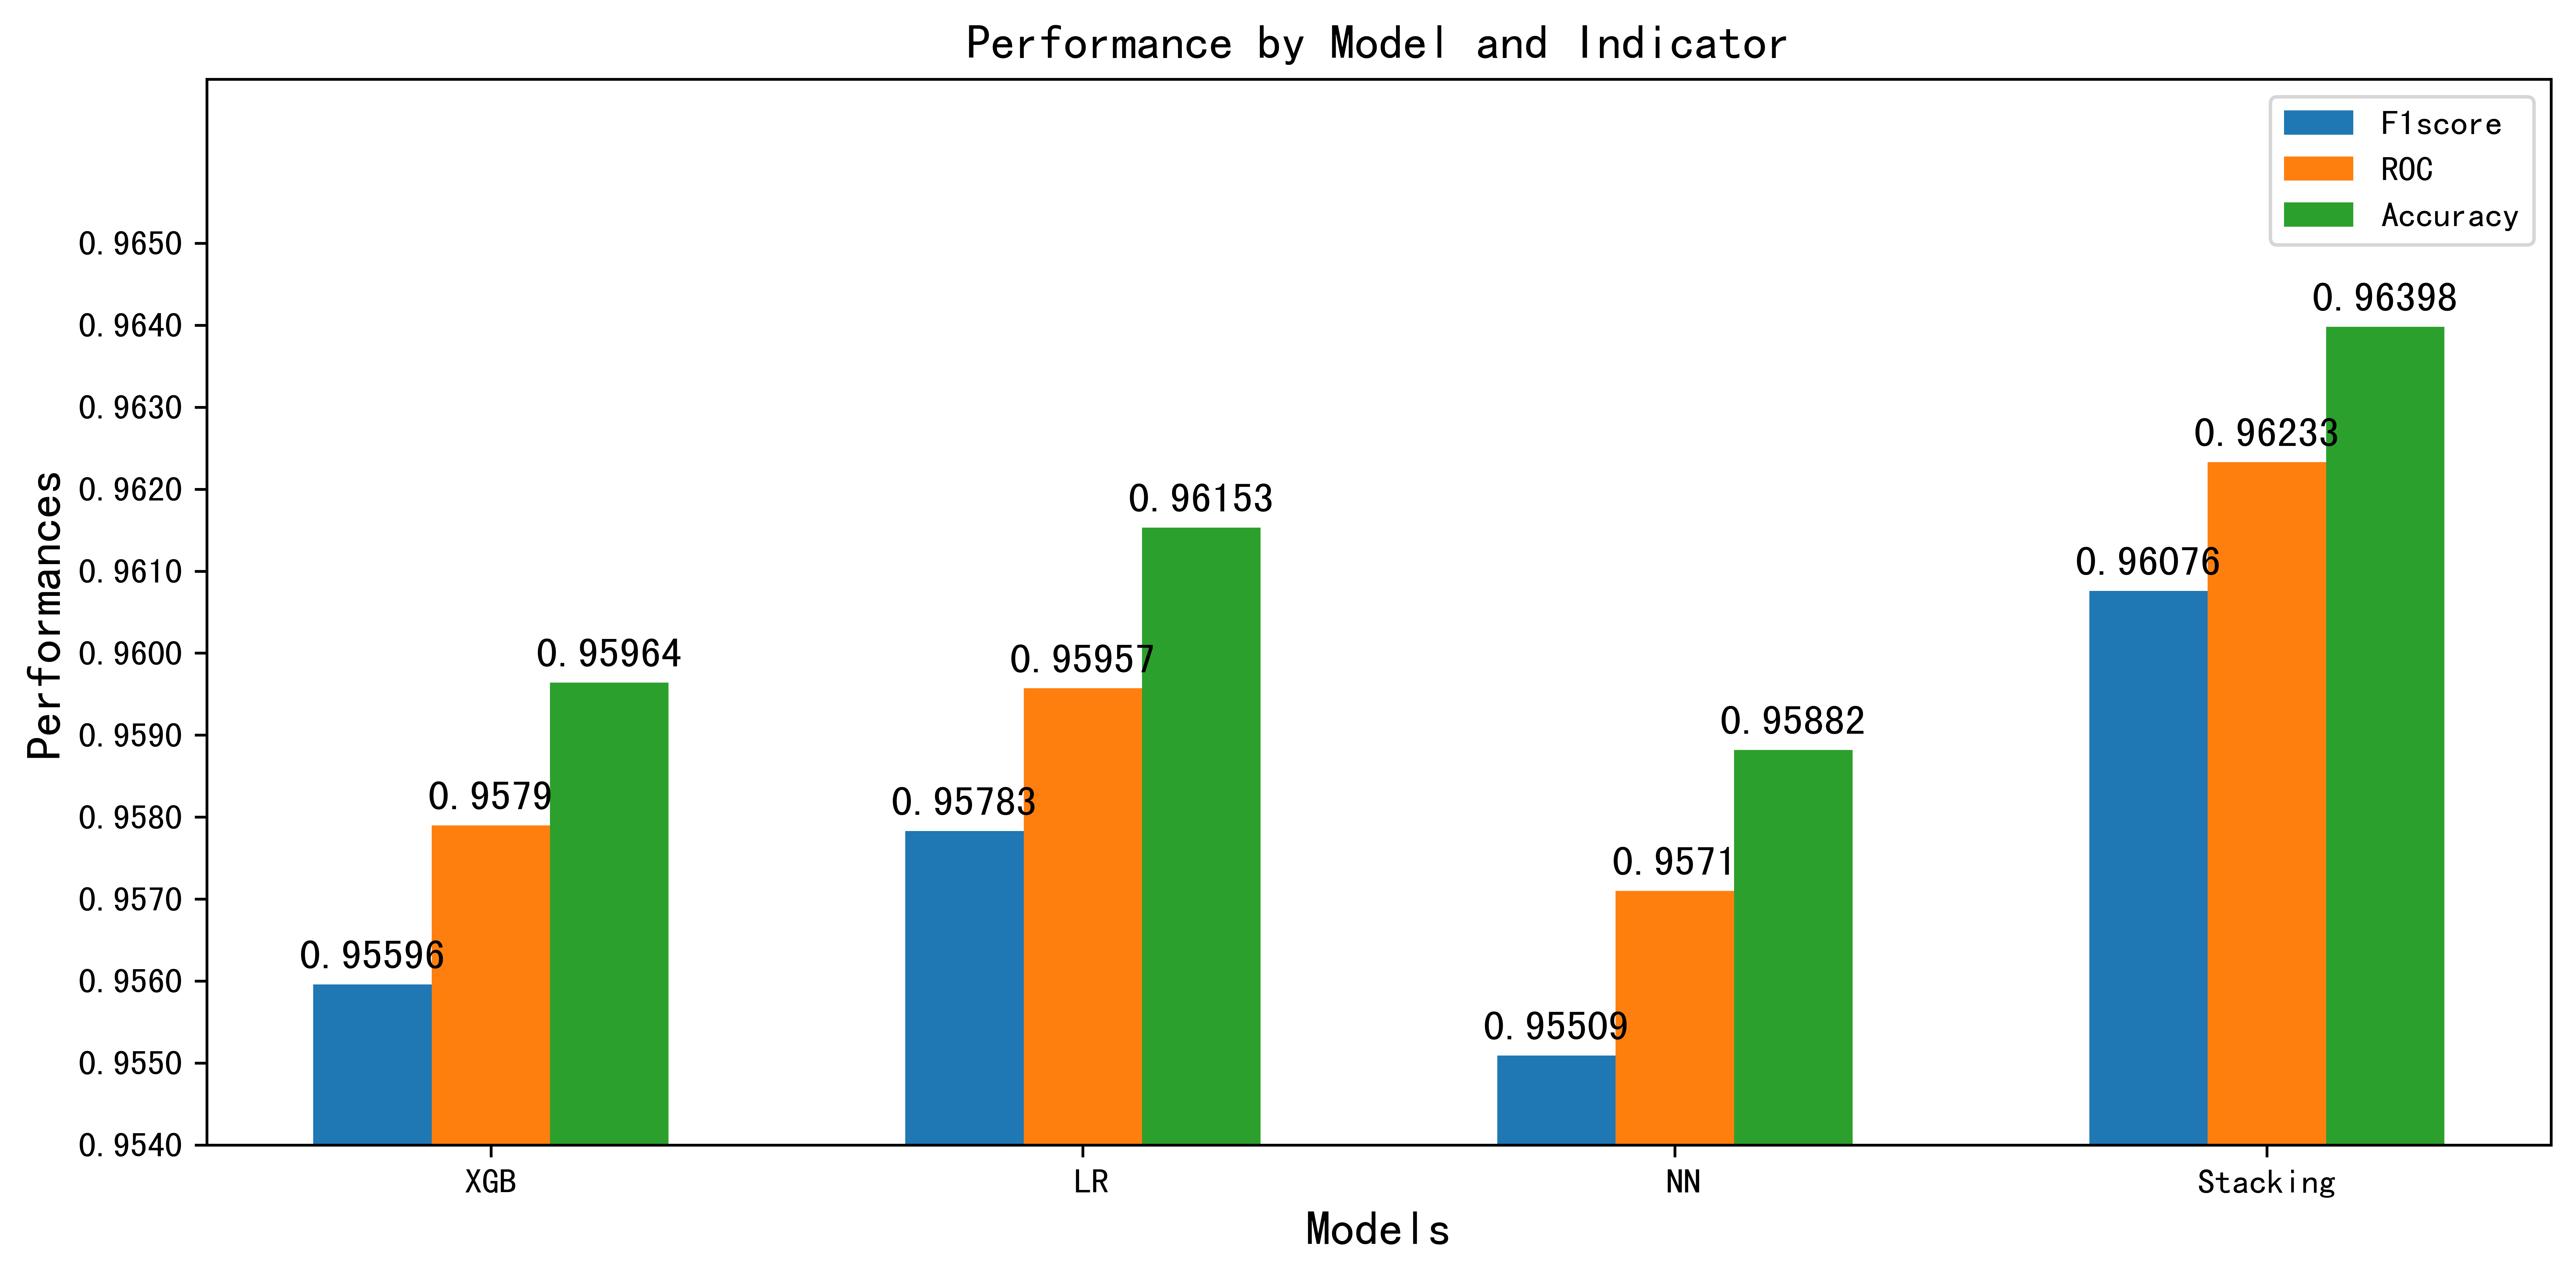

In [207]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi'] = 800

plt.rcParams['savefig.dpi'] = 400 
labels = ['XGB', ' LR', ' NN', 'Stacking']
f1score = [0.95596,0.95783,0.95509,0.96076]
ROC = [0.95790,0.95957,0.95710,0.96233]
Accuracy=[0.95964,0.96153,0.95882,0.96398]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, f1score, width, label='F1score')
rects2 = ax.bar(x , ROC, width, label='ROC')
rects3 = ax.bar(x + width, Accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Performance by Model and Indicator',fontsize=14)
ax.legend(fontsize=10)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.xlabel('Models',fontsize=14)
plt.ylabel('Performances',fontsize=14)

# 设置 x 和 y 轴标尺最大最小值
# plt.xlim(1, 12)
plt.ylim(0.95400, 0.96700)
# plt.axis([1, 12, 0, 100]) # 一次性设置

# 设置 x 和 y 轴标尺
plt.yticks(np.arange(0.95400, 0.96500, 0.00100), 
           ['0.9540','0.9550','0.9560', '0.9570', '0.9580', 
                                          '0.9590', '0.9600', 
                                          '0.9610', '0.9620',
                                          '0.9630', '0.9640',
                                          '0.9650'])
plt.xticks(np.arange(4), labels)


plt.show()
